In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from scipy.stats import norm

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams['axes.titlesize'] = 12

53.75
[103.75 211.25]
49.909722671962356 92.88437265377311
93.66817411155759 136.41641963036608

57.18085106382979
[107.18085106 207.81914894]
50.181332518395266 95.65449904888183
92.33688953012143 136.47868484062727

60.39325842696629
[110.39325843 204.60674157]
49.95799957176945 98.31646583451194
92.31487241222445 140.5302755959163

64.75903614457832
[114.75903614 200.24096386]
50.35631934072927 101.7952011513226
91.7389553757138 143.1737096306675

68.91025641025641
[118.91025641 196.08974359]
49.837861500292775 105.11785712517704
90.73452982395676 145.25653439182625

74.65277777777779
[124.65277778 190.34722222]
49.172110465155754 108.70890920612473
89.36097963032302 148.80419428523004

80.22388059701494
[130.2238806 184.7761194]
51.537865001749424 115.91198066799873
89.18331299850783 153.57386184684324

88.11475409836066
[138.1147541 176.8852459]
50.72591482625563 120.41054246519252
86.06004029058585 156.1102900431325

95.98214285714285
[145.98214286 169.01785714]
50.5473595618497 

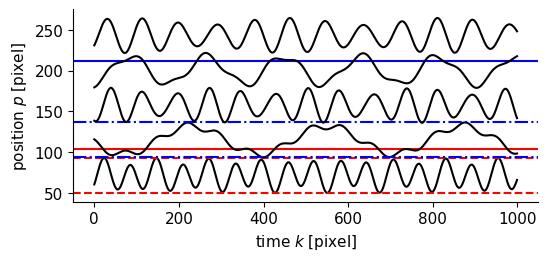

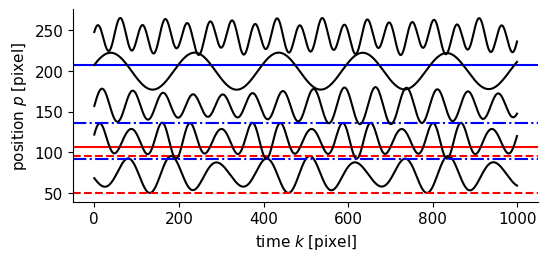

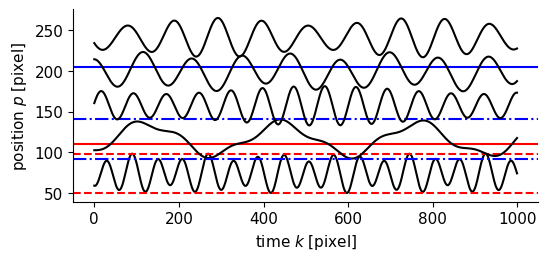

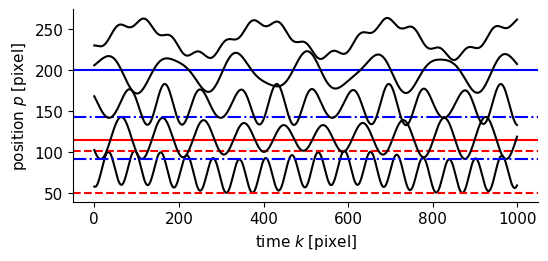

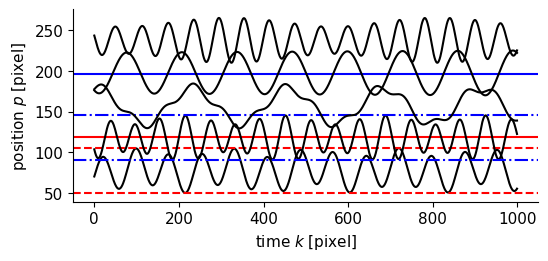

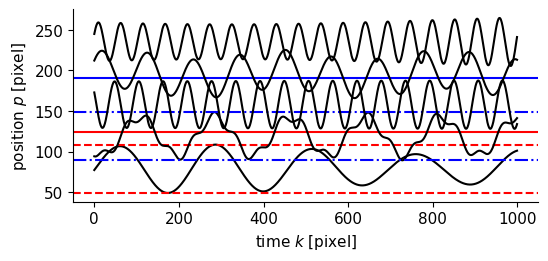

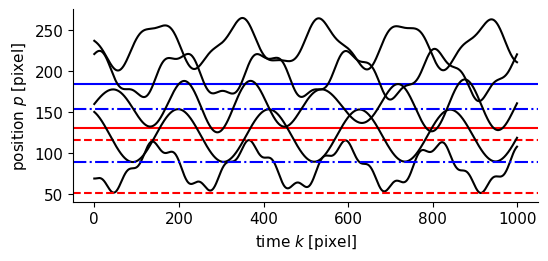

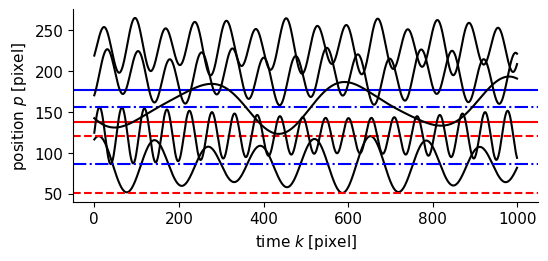

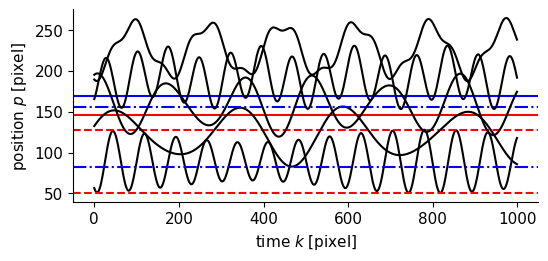

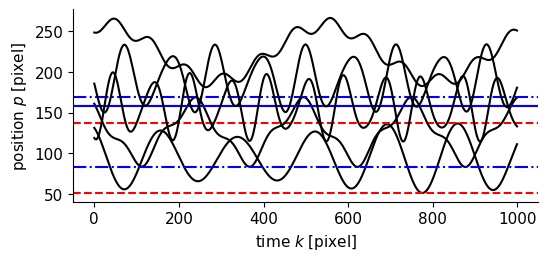

In [2]:
overlaps = ["00", "06", "11", "17", "22", "28", "33", "39", "44", "50"]
overlap_values = [0, 0.06, 0.11, 0.17, 0.22, 0.28, 0.33, 0.39, 0.44, 0.5]
colors = ['r', 'b', 'k', 'g', 'm', 'c', 'y', 'orange', 'purple', 'pink']
linestyles = ['--', '-.', '--', '-.', '--', '-.']

for j, overlap in enumerate(overlaps):
    # image_path =  (
    #     r"D:\Courses\Uclouvain\thesis\code\thesis_Colin\seismogram_curve_extraction\data_2_traces\resampled\BE_UCC__HHE_2024-01-01T00-06-00_2024-01-14T00-12-00_1000_1_0-1\overlap_0-"
    #     + overlap
    #     + r"\signals\image_00005.jpg"
    # )

    # GT_path = (
    #     r"D:\Courses\Uclouvain\thesis\code\thesis_Colin\seismogram_curve_extraction\data_2_traces\resampled\BE_UCC__HHE_2024-01-01T00-06-00_2024-01-14T00-12-00_1000_1_0-1\overlap_0-"
    #     + overlap
    #     + r"\ground_truth\sample_00005.npy"
    # )   

    
    image_path =  (
        r"D:\Courses\Uclouvain\thesis\code\thesis_Colin\seismogram_curve_extraction\data_5_traces\sines\overlap_0-"
        + overlap
        + r"\signals\image_00005.jpg"
    )

    GT_path = (
        r"D:\Courses\Uclouvain\thesis\code\thesis_Colin\seismogram_curve_extraction\data_5_traces\sines\overlap_0-"
        + overlap
        + r"\ground_truth\sample_00005.npy"
    )   

    ground_truth = np.load(GT_path)
    GT_vel = np.load(GT_path.removesuffix('.npy') + "_vel.npy")
    GT_acc = np.load(GT_path.removesuffix('.npy') + "_acc.npy")
    max = ground_truth.max(axis=1)
    min = ground_truth.min(axis=1)

    image_source = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    image_source = image_source.astype(np.float32) / 255.0  # Normalize to [0, 1]
    image_source = image_source.max() - image_source  # Invert the image
    # print("image shape", image_source.shape)
    height, width = image_source.shape
    t_margin, b_margin = 50, 50
    num_signals = 2

    plt.figure(figsize=(6, 2.5))
    # plt.imshow(image_source.max()-image_source, cmap='gray', origin='lower')
    plt.xlabel(r"time $k$ [pixel]")
    plt.ylabel(r"position $p$ [pixel]")
    
    available_height = height - t_margin - b_margin
    max_amplitude = (available_height / num_signals) / (1 - overlap_values[j])
    print(max_amplitude/2)
    vertical_offsets = np.linspace(t_margin + max_amplitude / 2, height - b_margin - max_amplitude / 2, num_signals)
    print(vertical_offsets)
    print(min[0], max[0])
    print(min[1], max[1])
    for i in range(len(max)):
        plt.plot(ground_truth[i], color='k')
        if i <2:
            plt.axhline(y=max[i], color=colors[i], linestyle=linestyles[i])
            plt.axhline(y=vertical_offsets[i], color=colors[i], linestyle='-')
            plt.axhline(y=min[i], color=colors[i], linestyle=linestyles[i])

    plt.grid(False)
    print()

    save_path = r"output_overlap\resampled\2_curves\overlap_{}.pdf".format(overlap)
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, bbox_inches='tight', dpi=300, format='pdf')

# Proof the Gaussian noise hypothesis for Kalman Filtering Methods

[131.3367802  130.57971191 129.77319092 128.91845    128.01678867
 127.06957113 126.07822418 125.04423495 123.96914864 122.85456611]
[130.57971191 129.77319092 128.91845    128.01678867 127.06957113
 126.07822418 125.04423495 123.96914864 122.85456611 121.70214143]


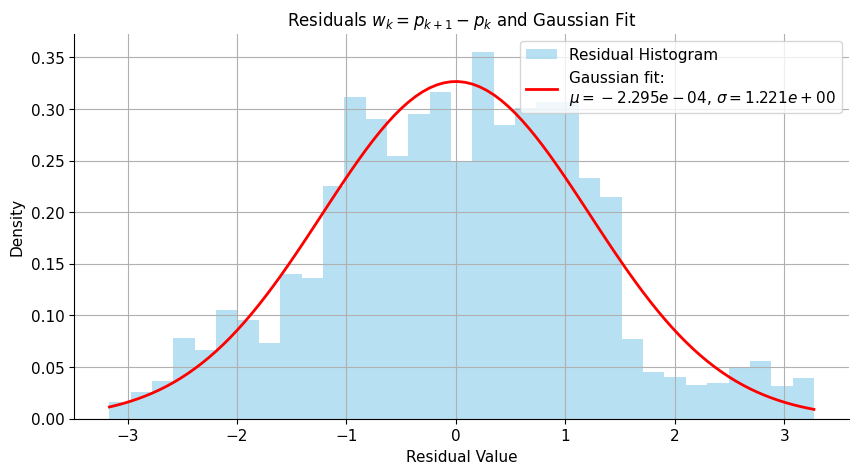

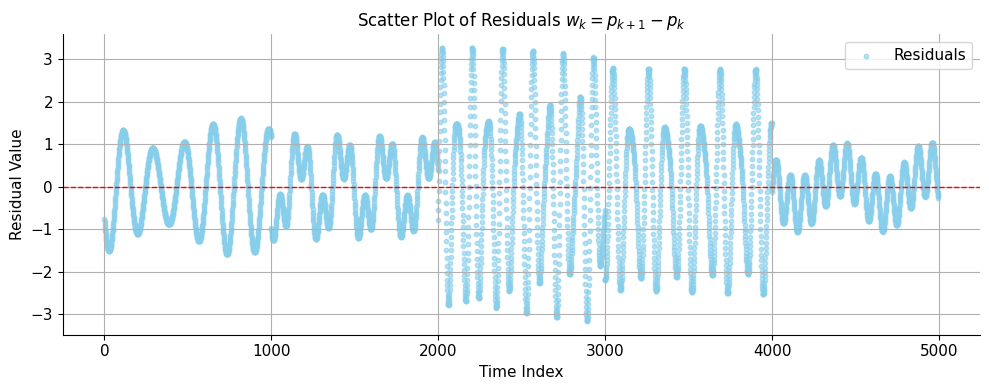

4 residuals with abs value < 1e-3


In [3]:
# Stack data from both curves
X = np.hstack([ground_truth[i, :-1] for i in range(len(ground_truth))])
Y = np.hstack([ground_truth[i, 1:] for i in range(len(ground_truth))])
print(X[:10])
print(Y[:10])

# Residuals assuming p_{k+1} = p_k + w_k
residuals = Y - X

# Fit a Gaussian to the residuals
mu, std = norm.fit(residuals)
x_vals = np.linspace(residuals.min(), residuals.max(), 100)

# Plot histogram and Gaussian fit
plt.figure(figsize=(10, 5))

# Choose symmetric bins centered around zero
plt.hist(residuals, bins='auto', density=True, alpha=0.6, color='skyblue', label='Residual Histogram')

plt.plot(x_vals, norm.pdf(x_vals, mu, std), 'r-', lw=2,
         label=f'Gaussian fit:\n$\\mu = {mu:.3e}$, $\\sigma = {std:.3e}$')
plt.title('Residuals $w_k = p_{k+1} - p_k$ and Gaussian Fit')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.scatter(np.arange(len(residuals)), residuals, s=10, alpha=0.6, color='skyblue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title(r'Scatter Plot of Residuals $w_k = p_{k+1} - p_k$')
plt.xlabel('Time Index')
plt.ylabel('Residual Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(np.sum(np.abs(residuals) < 1e-3), "residuals with abs value < 1e-3")



In [4]:
# add a statistical test like Shapiro-Wilk to reinforce your conclusion:

from scipy.stats import shapiro

stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}")
if p > 0.05:
    print("Residuals likely follow a Gaussian distribution (fail to reject H0).")
else:
    print("Residuals likely do NOT follow a Gaussian distribution (reject H0).")

Shapiro-Wilk test statistic = 0.9941, p-value = 0.0000
Residuals likely do NOT follow a Gaussian distribution (reject H0).


<Figure size 800x400 with 0 Axes>

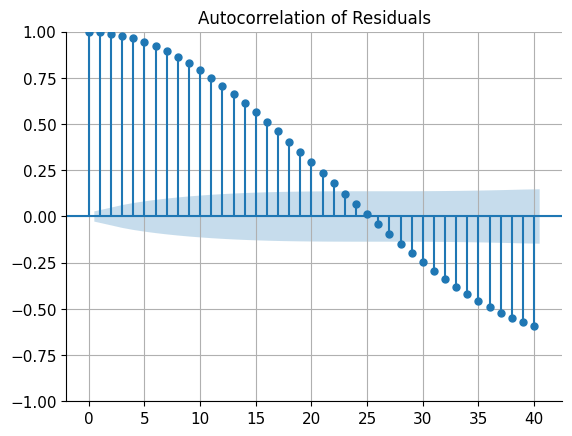

In [5]:
# verify whether the noise is uncorrelated (white):

from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8, 4))
plot_acf(residuals, lags=40)
plt.title("Autocorrelation of Residuals")
plt.show()

## in 2d

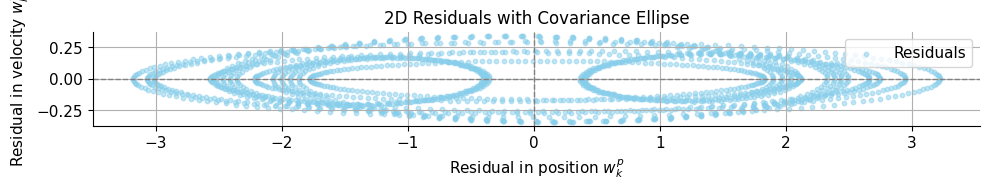

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro
from matplotlib.patches import Ellipse
from statsmodels.graphics.tsaplots import plot_acf

# Simulated example data (replace these with actual arrays)
np.random.seed(0)
n_curves = 2
T = 1000
dt = 0.2

velocity_ground_truth = GT_vel

# Flatten position and velocity data
P_k = np.hstack([ground_truth[i, :-1] for i in range(n_curves)])
P_k1 = np.hstack([ground_truth[i, 1:] for i in range(n_curves)])
V_k = np.hstack([velocity_ground_truth[i, :-1] for i in range(n_curves)])
V_k1 = np.hstack([velocity_ground_truth[i, 1:] for i in range(n_curves)])

# Compute 2D residuals
res_p = P_k1 - (P_k + dt * V_k)
res_v = V_k1 - V_k
residuals_2d = np.vstack([res_p, res_v]).T

# Shapiro-Wilk tests
stat_p, pval_p = shapiro(res_p)
stat_v, pval_v = shapiro(res_v)

# Covariance ellipse function
def plot_cov_ellipse(cov, pos, ax, n_std=2.0, **kwargs):
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(eigvals)
    ellipse = Ellipse(xy=pos, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

# Plot 1: 2D Scatter with Covariance Ellipse
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(residuals_2d[:, 0], residuals_2d[:, 1], alpha=0.5, s=10, color='skyblue', label='Residuals')
mean_res = residuals_2d.mean(axis=0)
cov_res = np.cov(residuals_2d, rowvar=False)
# plot_cov_ellipse(cov_res, mean_res, ax, n_std=2, edgecolor='red', facecolor='none', lw=2, label='95% ellipse')
ax.axhline(0, color='gray', linestyle='--', lw=1)
ax.axvline(0, color='gray', linestyle='--', lw=1)
ax.set_xlabel(r'Residual in position $w_k^p$')
ax.set_ylabel(r'Residual in velocity $w_k^v$')
ax.set_title('2D Residuals with Covariance Ellipse')
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
plt.tight_layout()

In [12]:
# Perform Shapiro-Wilk normality tests
stat_p, pval_p = shapiro(res_p)
stat_v, pval_v = shapiro(res_v)

# Print test results
print(f"Shapiro-Wilk test for position residuals:")
print(f"  Statistic = {stat_p:.4f}, p-value = {pval_p}")
if pval_p > 0.05:
    print("  Residuals likely follow a Gaussian distribution (fail to reject H₀).")
else:
    print("  Residuals likely do not follow a Gaussian distribution (reject H₀).")

print(f"\nShapiro-Wilk test for velocity residuals:")
print(f"  Statistic = {stat_v:.4f}, p-value = {pval_v:}")
if pval_v > 0.05:
    print("  Residuals likely follow a Gaussian distribution (fail to reject H₀).")
else:
    print("  Residuals likely do not follow a Gaussian distribution (reject H₀).")


Shapiro-Wilk test for position residuals:
  Statistic = 0.9526, p-value = 6.102921286047812e-25
  Residuals likely do not follow a Gaussian distribution (reject H₀).

Shapiro-Wilk test for velocity residuals:
  Statistic = 0.9691, p-value = 2.6414075168120248e-20
  Residuals likely do not follow a Gaussian distribution (reject H₀).


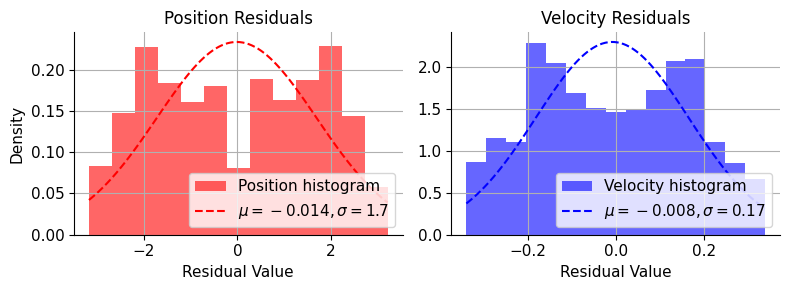

In [7]:
# Plot 2: Marginal Histograms with colors and axis labels
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
colors = ['r', 'b']
for i, (res, label) in enumerate(zip([res_p, res_v], ['Position', 'Velocity'])):
    mu, std = norm.fit(res)
    x_vals = np.linspace(res.min(), res.max(), 100)
    axs[i].hist(res, bins='auto', density=True, alpha=0.6, color=colors[i], label=f'{label} histogram')
    axs[i].plot(x_vals, norm.pdf(x_vals, mu, std), linestyle='--', color=colors[i],
                label=f'$\\mu={mu:.2}, \\sigma={std:.2}$')
    axs[i].set_title(f'{label} Residuals')
    axs[i].set_xlabel('Residual Value')

    if i ==0: axs[i].set_ylabel('Density')
    axs[i].legend(loc='lower right')
    axs[i].grid(True)

plt.tight_layout()

plt.savefig(r"results\sines_hist.pdf", bbox_inches='tight', dpi=300, format='pdf')

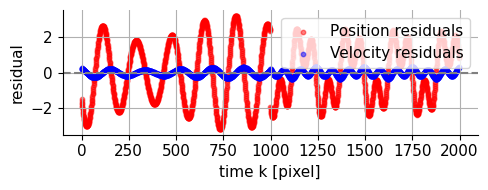

In [8]:
# Plot 3: Residuals over time (scatter)
plt.figure(figsize=(5, 2))
plt.scatter(np.arange(len(res_p)), res_p, s=10, alpha=0.5, label='Position residuals', color='r')
plt.scatter(np.arange(len(res_v)), res_v, s=10, alpha=0.5, label='Velocity residuals', color='b')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('time k [pixel]')
plt.ylabel('residual')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig(r"results\sines_residual.pdf", bbox_inches='tight', dpi=300, format='pdf')

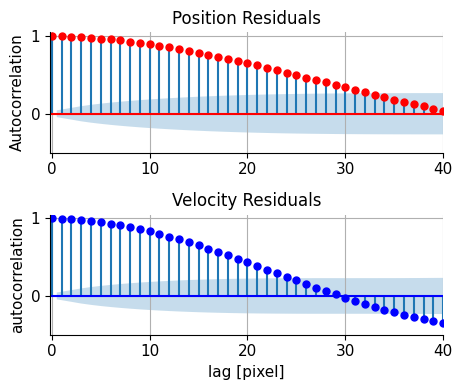

In [10]:
# Plot 4: Autocorrelation
fig, axs = plt.subplots(2, 1, figsize=(5, 4))

# Position residuals
plot_acf(res_p, lags=40, ax=axs[0], color='r')
axs[0].set_title('Position Residuals')
# axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Autocorrelation')
axs[0].set_xlim(-0.2, 40)
axs[0].set_ylim(-0.5, 1.05)  # Adjust as needed based on your data

# Velocity residuals
plot_acf(res_v, lags=40, ax=axs[1], color='b')
axs[1].set_title('Velocity Residuals')
axs[1].set_xlabel('lag [pixel]')
axs[1].set_ylabel('autocorrelation')
axs[1].set_xlim(-0.2, 40)
axs[1].set_ylim(-0.5, 1.05)

plt.tight_layout()

plt.savefig(r"results\sines_autocorelation.pdf", bbox_inches='tight', dpi=300, format='pdf')
